In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


In [8]:
img = plt.imread('/Users/vikoluna/Apps/PyCharm/pythonProject/pjViai/g@tu/redcross.png')

In [9]:
imgArray = np.asarray(img)
print(repr(img))

array([[[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        ...,
        [0.9019608 , 0.9019608 , 0.90588236, 1.        ],
        [0.9019608 , 0.9019608 , 0.90588236, 1.        ],
        [0.9019608 , 0.9019608 , 0.90588236, 1.        ]],

       [[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        ...,
        [0.9019608 , 0.9019608 , 0.90588236, 1.        ],
        [0.9019608 , 0.9019608 , 0.90588236, 1.        ],
        [0.9019608 , 0.9019608 , 0.90588236, 1.        ]],

       [[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        ...,
        [0.9019608 , 0.9019608 , 0.90588236, 1.        ],
        [0.9019608 , 0.901960

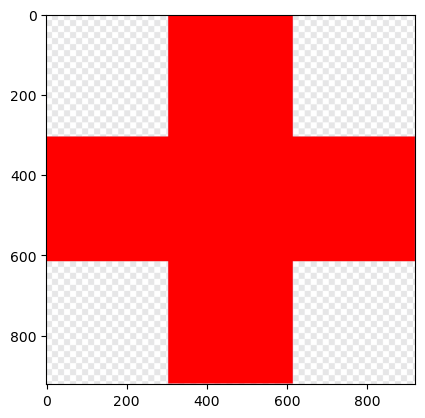

In [10]:
imgplot = plt.imshow(img)

In [11]:
# Get the dimensions of the image
h, w, _ = img.shape

# Calculate center of image
center_x = w // 2
center_y = h // 2

print(center_x, center_y)

460 461


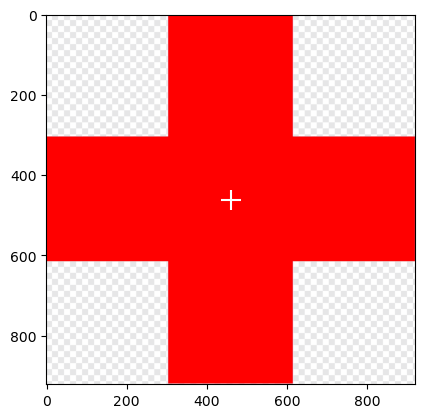

In [12]:
plt.imshow(img)
plt.scatter(center_x, center_y, marker="+", color="white", s=200)
plt.show()

In [13]:
# Initialize the radar values array with 3600 samples per angle
radar_values = np.zeros((h // 2, 3600))

# Iterate over angles and radio
for angle in np.arange(0, 3600, 1.0):
    for r in range(h // 2):
        x = int(np.round(center_x + r * np.sin(np.deg2rad(angle))))
        y = int(np.round(center_y + r * np.cos(np.deg2rad(angle))))
        if x < 0 or x >= w or y < 0 or y >= h:
            radar_values[r, int(angle * 1)] = 0
        else:
            radar_values[r, int(angle * 1)] = img[y, x, 0]

# Calculate average values at each angle
avg_values = np.mean(radar_values, axis=0)

# Save radar sweep to text file
data = np.column_stack((np.arange(0, 3600, 1.0), avg_values))
# save the data as a CSV file
np.savetxt('radarSweep.csv', data, delimiter=',', header='C1,C2', comments='', fmt='%.3f')

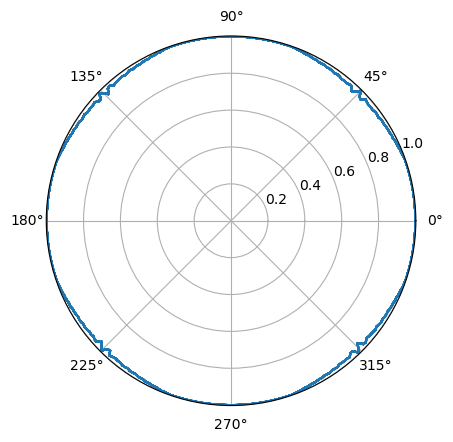

In [14]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.deg2rad(np.arange(0, 3600, 1.0)), avg_values)

In [15]:
# set limits of x and y-axis
xLim = ax.set_xlim([0, img.shape[1]])
yLim = ax.set_ylim([0, img.shape[0]])
print(xLim, yLim)

# remove ticks and numbers
ax.set_xticks([])
ax.set_yticks([])

(0.0, 920.0) (0.0, 922.0)


[]

In [16]:
# calculate center of image
center_x = img.shape[1] / 2
center_y = img.shape[0] / 2
max_distance = np.sqrt((img.shape[0] / 2) ** 2 + (img.shape[1] / 2) ** 2)

print(max_distance)

651.2457293526


In [17]:
# create line for radar sweeping
line, = ax.plot([center_x, center_x], [center_y, center_y - 50], color='blue',
                linewidth=2, solid_capstyle='round')

# define parameters for pulsation
freq = 10
amp = 5

# define function to update line position in animation
def update_line(num):
    angle = np.deg2rad(num)
    r = max_distance + amp * np.sin(2.0 * np.pi * freq * num / num_frames)
    x = center_x + r * np.cos(angle)
    y = center_y - r * np.sin(angle)
    line.set_data([center_x, x], [center_y, y])
    alpha = 1  # (1-r/100)**3 # calculate alpha value based on distance from center
    line.set_linewidth(2)  # (2 + 4*(1-r/1000)) # set line thickness based on distance from center
    line.set_alpha(alpha)  # set alpha value to create beam-like effect
    line.set_solid_capstyle('round')
    return line

# create animation object
num_frames = 1440  # 72 seconds at 50ms per frame
frames = np.linspace(0, 360, num_frames, endpoint=False)
ani = animation.FuncAnimation(fig, update_line, frames=frames,
                              interval=50)


In [18]:
# create video writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='VikoLuna'), bitrate=1800)

# save animation as video
ani.save('videoMov.mp4', writer=writer)

In [26]:
figNew = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111, projection='polar')
ax1.set_ylim(0,100)

data = img
np.deg2rad(np.arange(0, 3392960, 1.0))
theta = avg_values
l,  = ax.plot([],[])

# define function to update line position in animation
def update(i):
    global data
    angle = np.deg2rad(i)
    r = max_distance + amp * np.sin(2.0 * np.pi * freq * i / num_frames)
    x = center_x + r * np.cos(angle)
    y = center_y - r * np.sin(angle)
    line.set_data([center_x, x], [center_y, y])
    alpha = 1  # (1-r/100)**3 # calculate alpha value based on distance from center
    line.set_linewidth(2)  # (2 + 4*(1-r/1000)) # set line thickness based on distance from center
    line.set_alpha(alpha)  # set alpha value to create beam-like effect
    line.set_solid_capstyle('round')
    data[-1] = data[0]
    return line,

# create animation object
num_frames = 1440  # 72 seconds at 50ms per frame
frames = np.linspace(0, 3600, num_frames, endpoint=False)
ani = animation.FuncAnimation(figNew, update_line, frames=frames,
                              interval=50)

# create video writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='VikoLuna'), bitrate=1800)

# save animation as video
ani.save('vidScr.mp4', writer=writer)

<Figure size 400x400 with 0 Axes>